In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [55]:
file_path = '../../data/raw/parenting_styles.csv'
df = pd.read_csv(file_path)

In [56]:
df.head()

,parent_id,parenting_style,child_mental_health,communication_skills,emotional_wellbeing,social_skills,academic_performance,parent_involvement
0,1,Helicopter,89,56,68,72,75,75
1,2,Neglectful,52,82,81,87,67,69
2,3,Indulgent,52,76,59,82,88,59
3,4,Uninvolved,58,70,67,82,76,68
4,5,Helicopter,35,76,57,77,84,87


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   parent_id             50000 non-null  int64 
 1   parenting_style       50000 non-null  object
 2   child_mental_health   50000 non-null  int64 
 3   communication_skills  50000 non-null  int64 
 4   emotional_wellbeing   50000 non-null  int64 
 5   social_skills         50000 non-null  int64 
 6   academic_performance  50000 non-null  int64 
 7   parent_involvement    50000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 3.1+ MB


In [58]:
missing_values = df.isnull().sum()
print(missing_values)

parent_id               0
parenting_style         0
child_mental_health     0
communication_skills    0
emotional_wellbeing     0
social_skills           0
academic_performance    0
parent_involvement      0
dtype: int64


In [59]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [60]:
df[numerical_cols] = df[numerical_cols].apply(lambda col: col.fillna(col.mean()))
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [61]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [62]:
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers = (z_scores > 3).sum(axis=0)
print(outliers)

parent_id               0
child_mental_health     0
communication_skills    0
emotional_wellbeing     0
social_skills           0
academic_performance    0
parent_involvement      0
dtype: int64


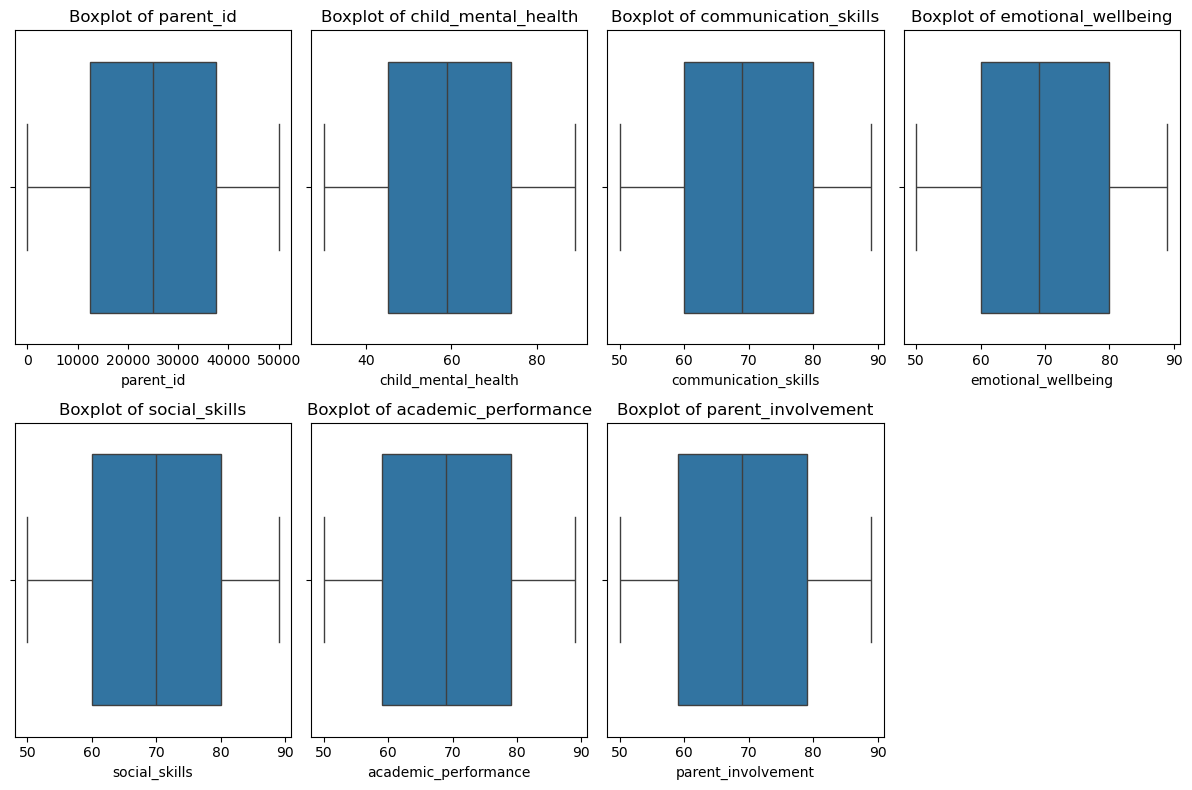

In [63]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [64]:
df.describe()

,parent_id,child_mental_health,communication_skills,emotional_wellbeing,social_skills,academic_performance,parent_involvement
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,59.519260,69.47914,69.541060,69.570740,69.460920,69.441480
std,14433.901067,17.267938,11.55096,11.553447,11.574316,11.558743,11.557668
min,1.000000,30.000000,50.00000,50.000000,50.000000,50.000000,50.000000
25%,12500.750000,45.000000,60.00000,60.000000,60.000000,59.000000,59.000000
50%,25000.500000,59.000000,69.00000,69.000000,70.000000,69.000000,69.000000
75%,37500.250000,74.000000,80.00000,80.000000,80.000000,79.000000,79.000000
max,50000.000000,89.000000,89.00000,89.000000,89.000000,89.000000,89.000000


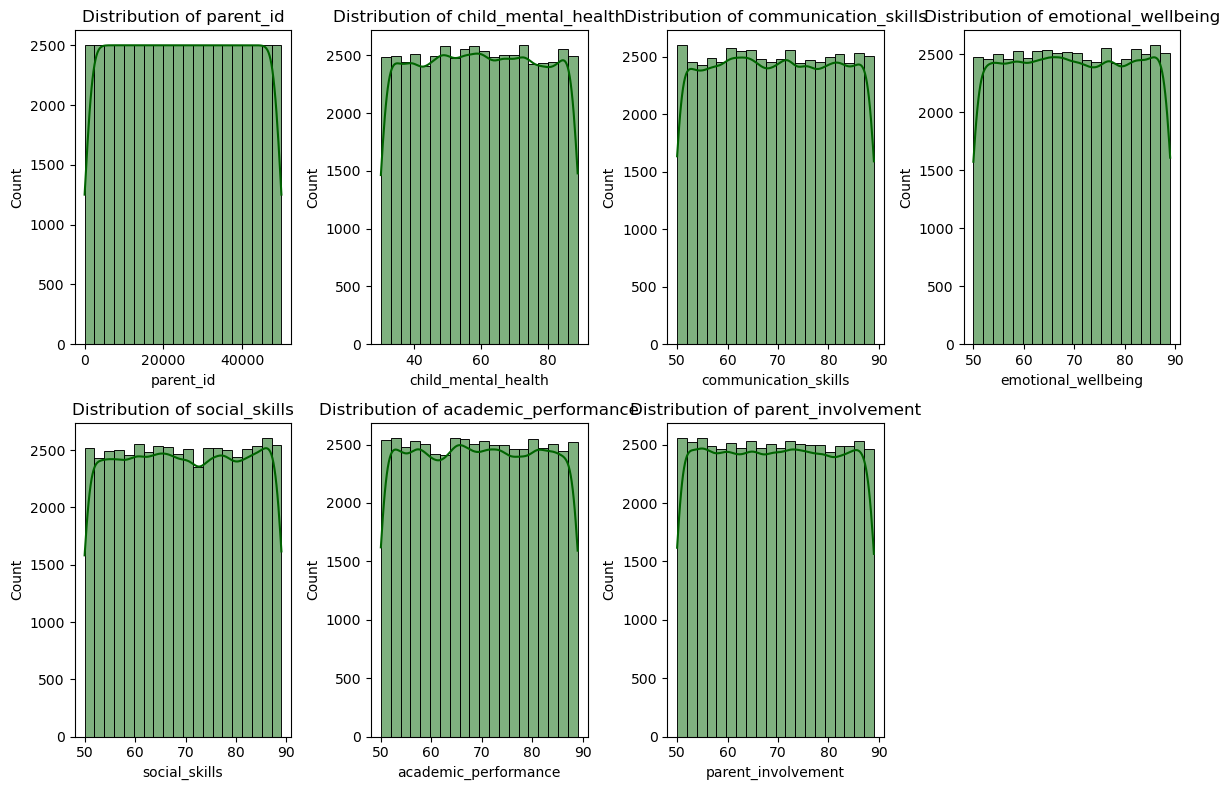

In [65]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='darkgreen')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

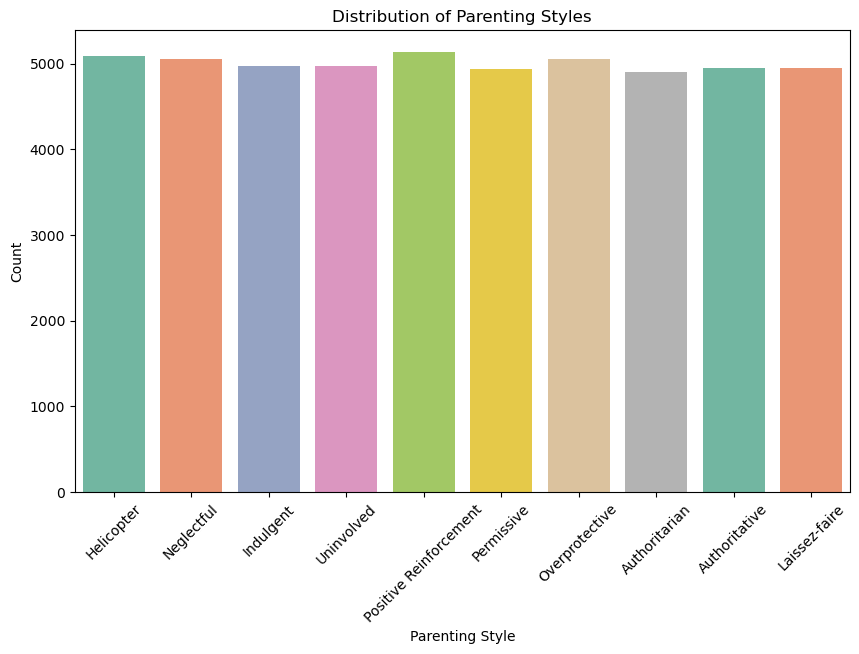

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parenting_style', data=df, palette='Set2', hue='parenting_style', legend=False)
plt.title('Distribution of Parenting Styles')
plt.xlabel('Parenting Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


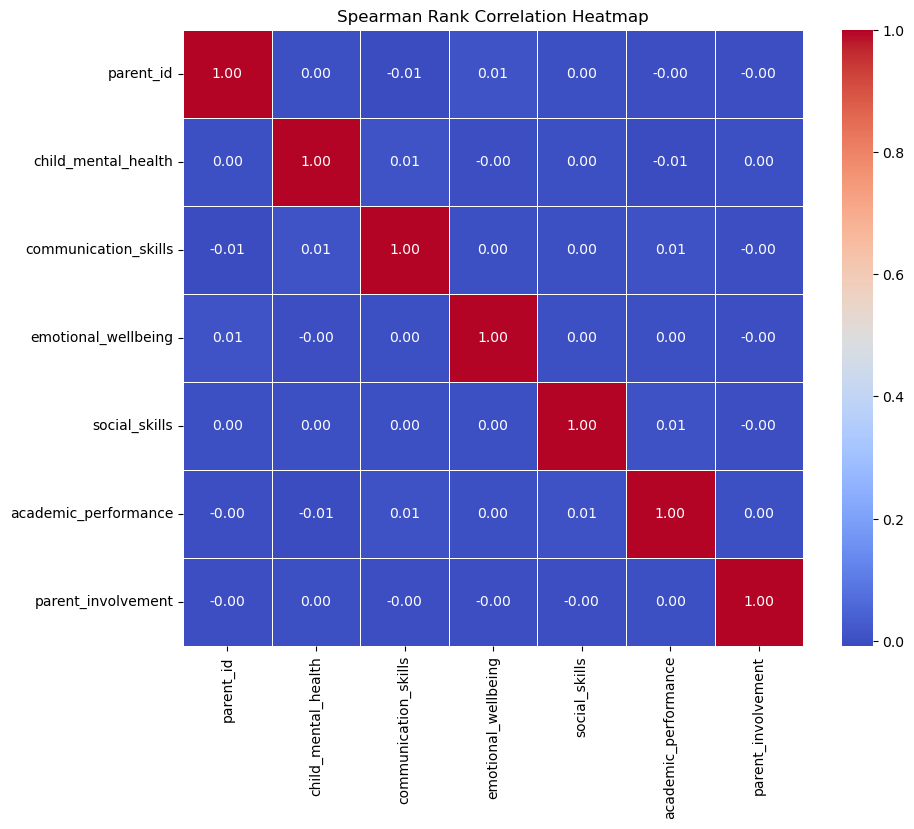

In [67]:
correlation_matrix = df[numerical_cols].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Rank Correlation Heatmap')
plt.show()


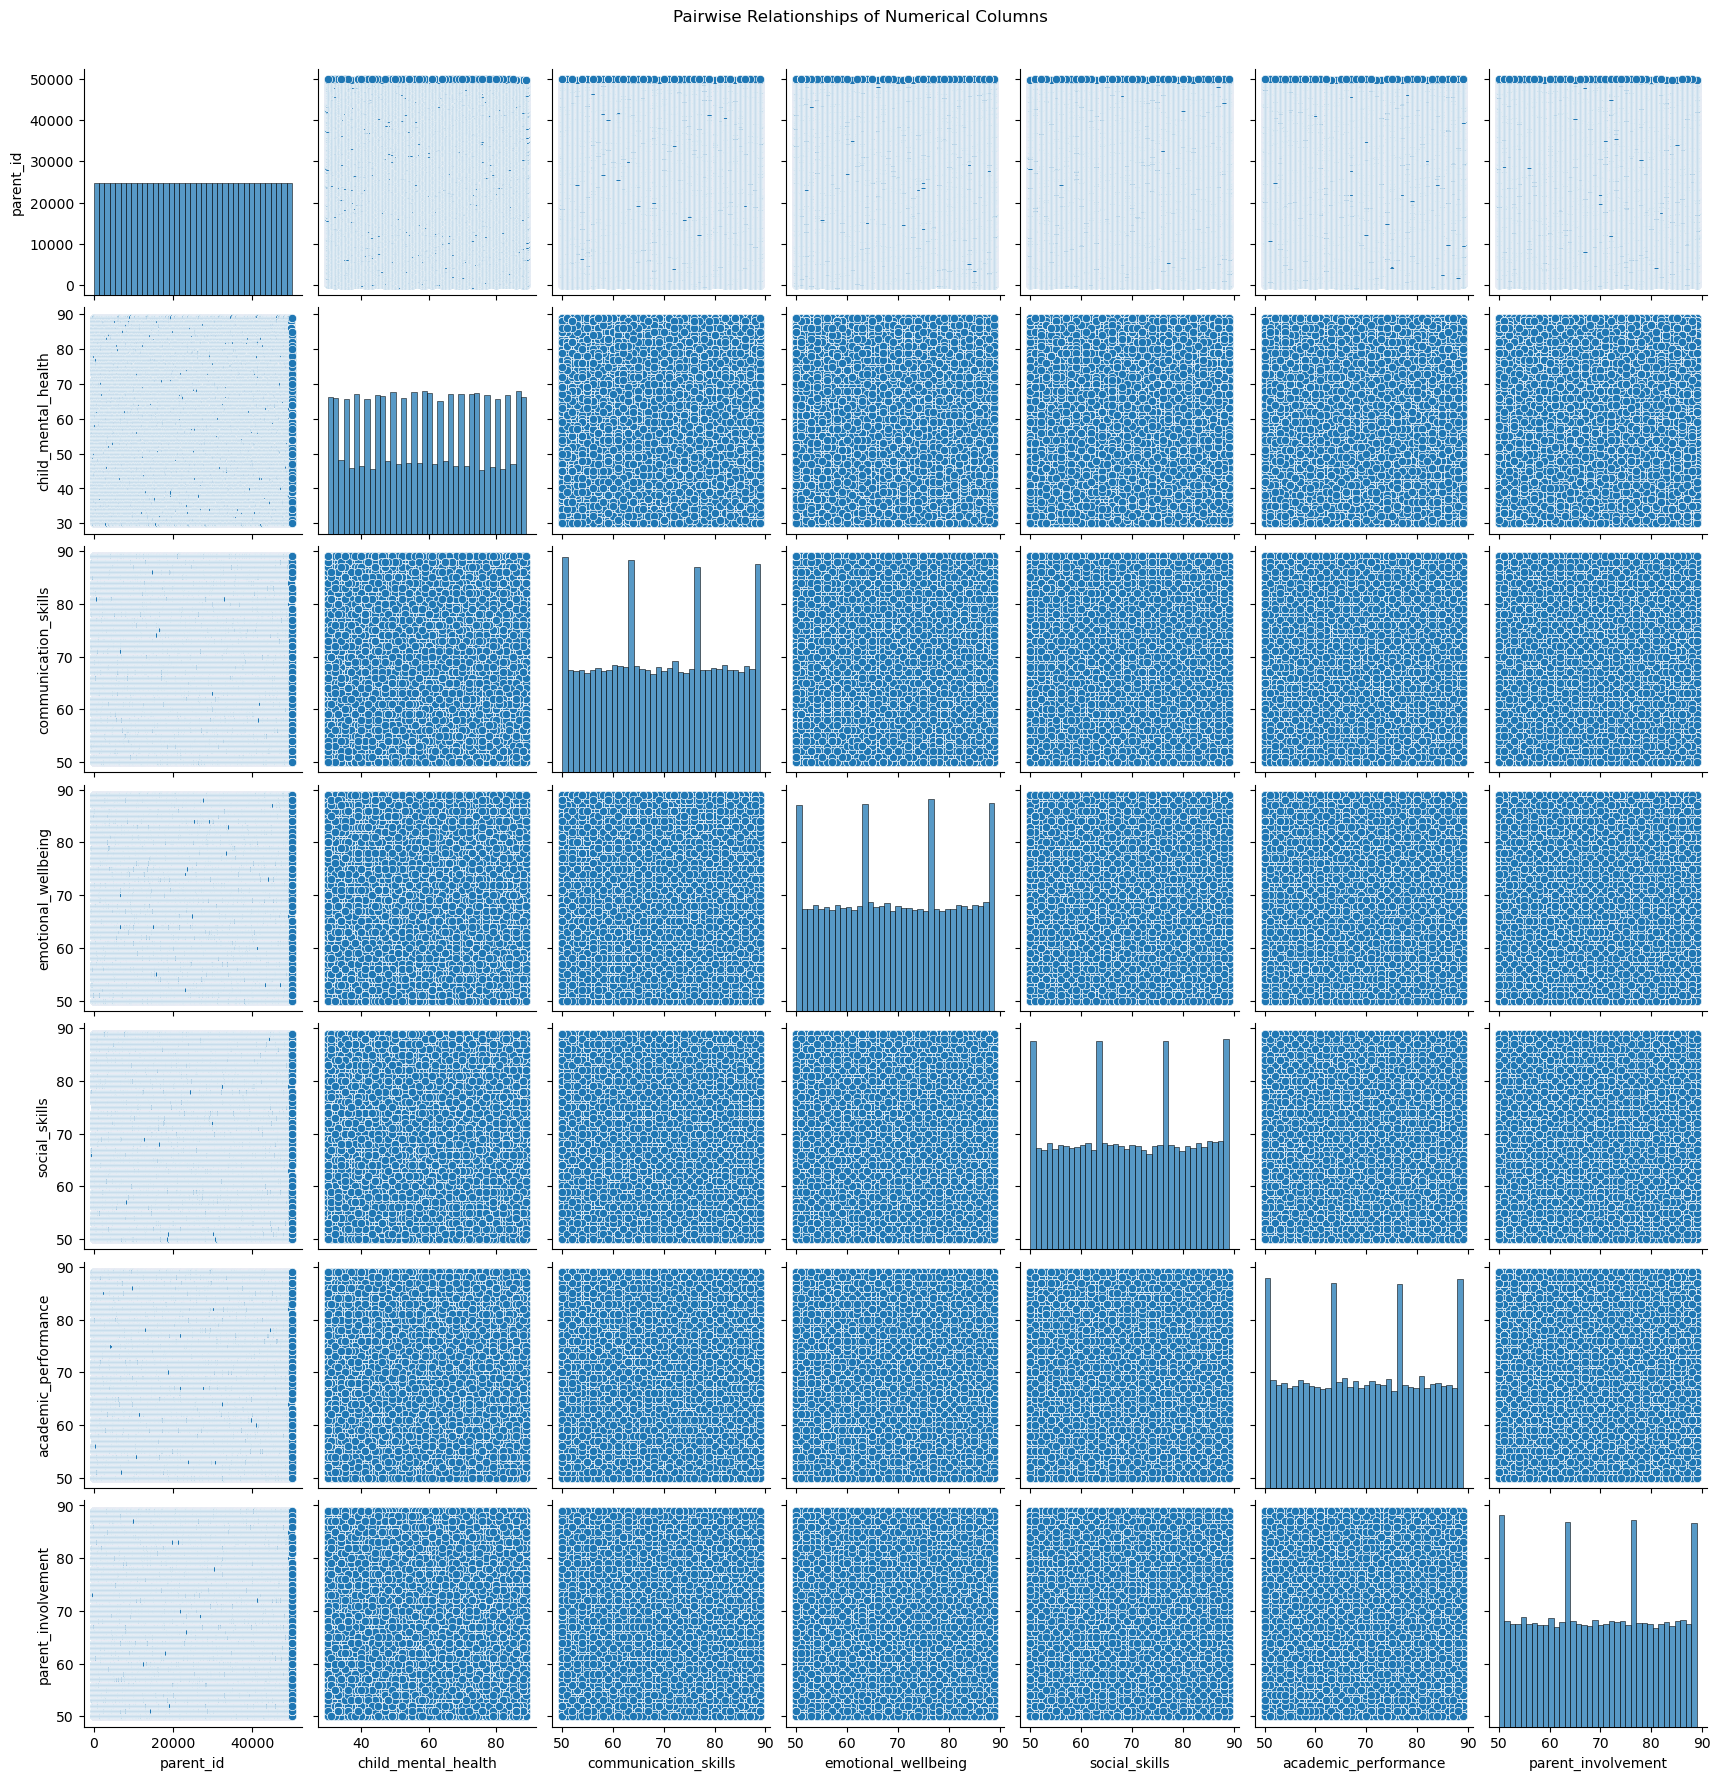

In [68]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairwise Relationships of Numerical Columns', y=1.02)
plt.show()


In [69]:
label_encoder = LabelEncoder()
df['parenting_style_encoded'] = label_encoder.fit_transform(df['parenting_style'])


In [70]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [71]:
df.head()


,parent_id,parenting_style,child_mental_health,communication_skills,emotional_wellbeing,social_skills,academic_performance,parent_involvement,parenting_style_encoded
0,-1.732016,Helicopter,1.707270,-1.166940,-0.133387,0.209886,0.479216,0.480943,2
1,-1.731947,Neglectful,-0.435451,1.083978,0.991830,1.505872,-0.212908,-0.038198,5
2,-1.731878,Indulgent,-0.435451,0.564535,-0.912383,1.073876,1.603917,-0.903434,3
3,-1.731808,Uninvolved,-0.087982,0.045093,-0.219942,1.073876,0.565732,-0.124722,9
4,-1.731739,Helicopter,-1.419944,0.564535,-1.085493,0.641881,1.257855,1.519225,2
